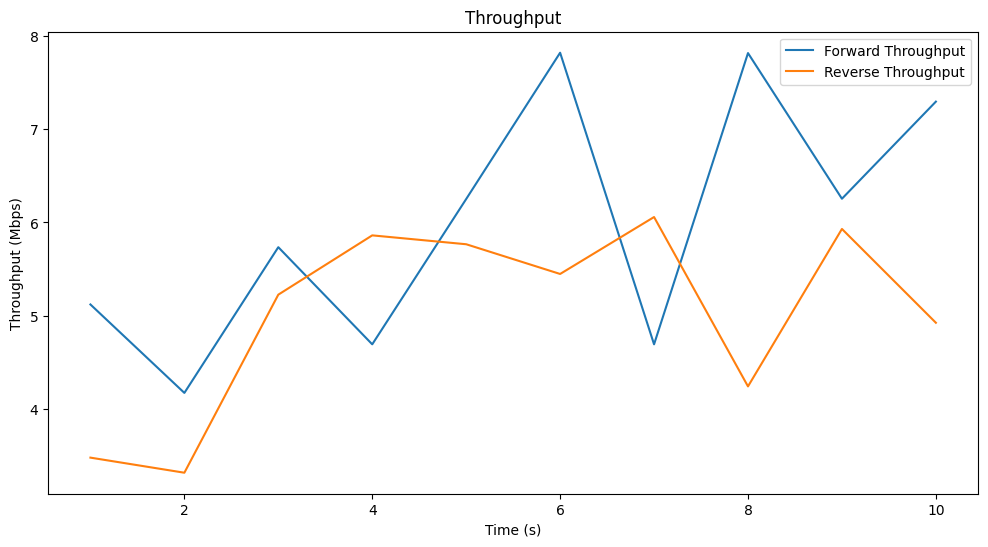

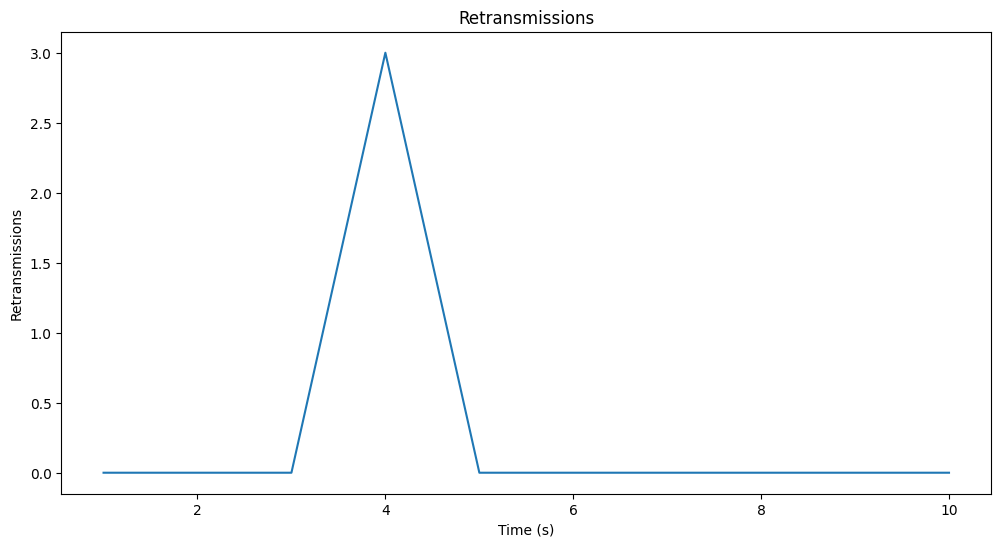

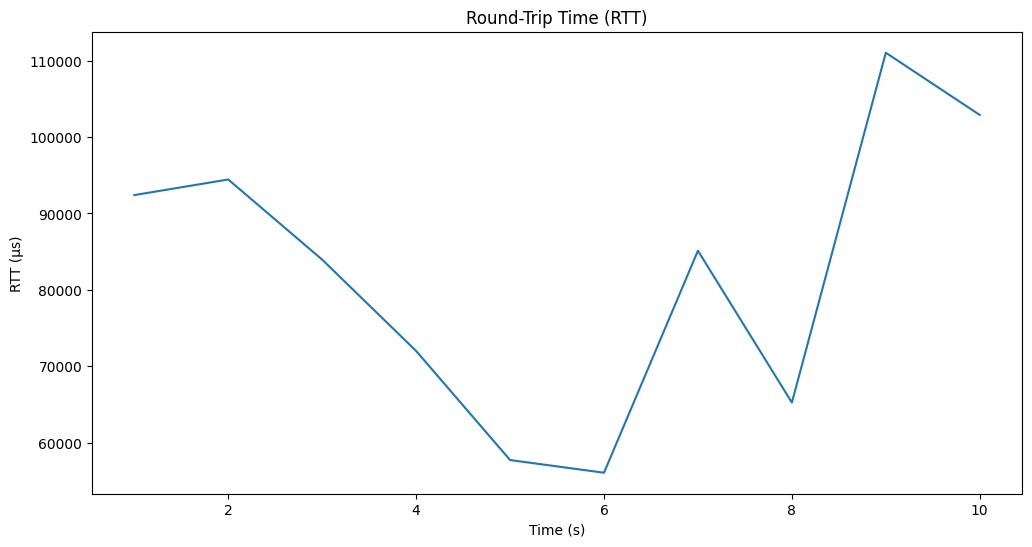

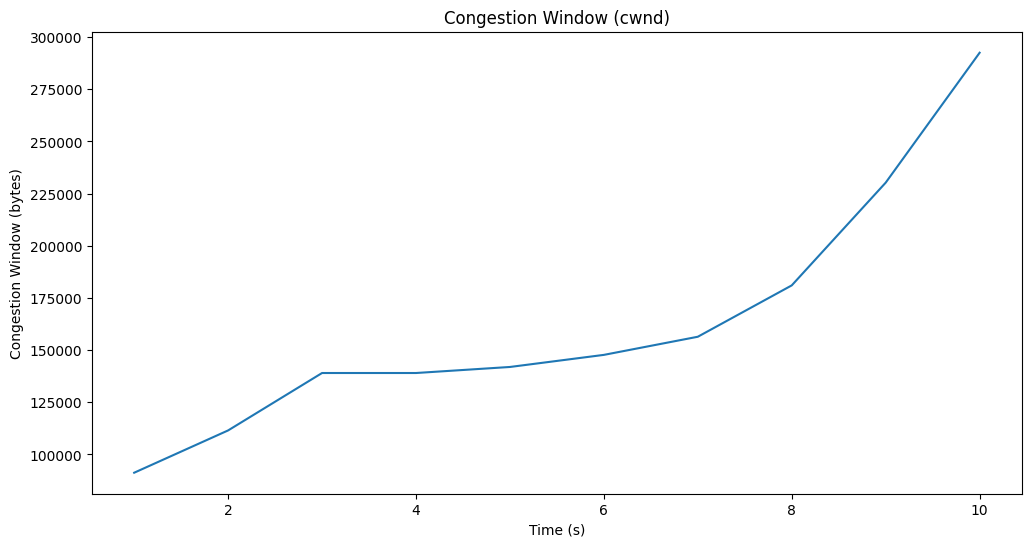

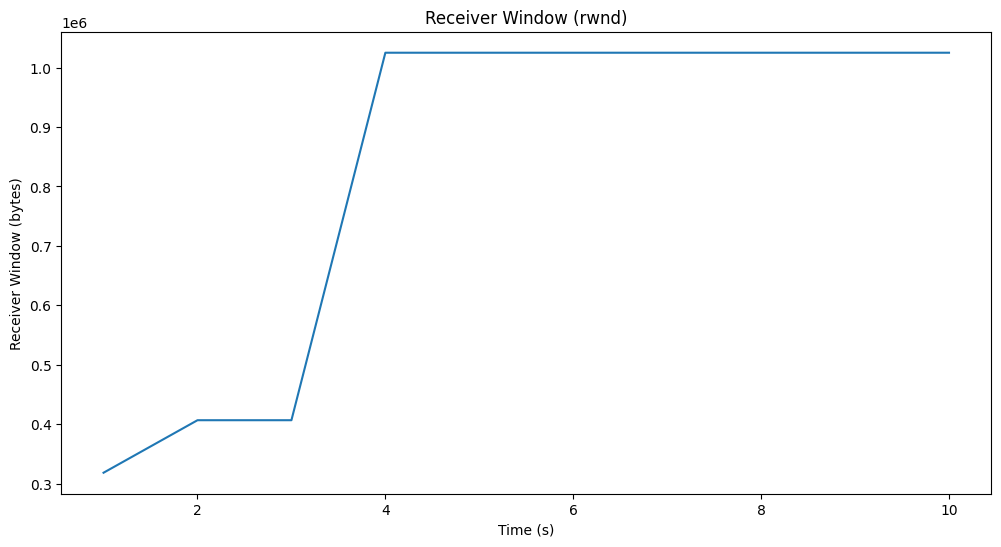

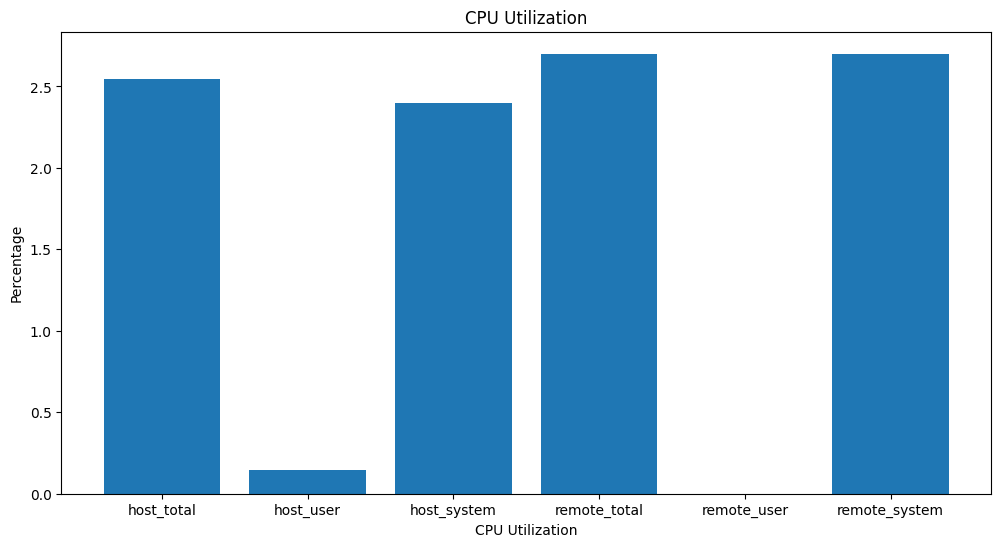

In [6]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open('./data/pi1/data1.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
timestamps = [interval['sum']['end'] for interval in intervals]
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput
plt.figure(figsize=(12, 6))
plt.plot(timestamps, throughputs, label='Forward Throughput')
plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

# Retransmissions
plt.figure(figsize=(12, 6))
plt.plot(timestamps, retransmits)
plt.xlabel('Time (s)')
plt.ylabel('Retransmissions')
plt.title('Retransmissions')
plt.show()

# Round-Trip Time (RTT)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, rtts)
plt.xlabel('Time (s)')
plt.ylabel('RTT (μs)')
plt.title('Round-Trip Time (RTT)')
plt.show()

# Congestion Window (cwnd)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, cwnds)
plt.xlabel('Time (s)')
plt.ylabel('Congestion Window (bytes)')
plt.title('Congestion Window (cwnd)')
plt.show()

# Receiver Window (rwnd)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, rwnds)
plt.xlabel('Time (s)')
plt.ylabel('Receiver Window (bytes)')
plt.title('Receiver Window (rwnd)')
plt.show()

# CPU Utilization
cpu_util = data['end']['cpu_utilization_percent']
cpu_names = list(cpu_util.keys())
cpu_values = list(cpu_util.values())

plt.figure(figsize=(12, 6))
plt.bar(cpu_names, cpu_values)
plt.xlabel('CPU Utilization')
plt.ylabel('Percentage')
plt.title('CPU Utilization')
plt.show()

In [7]:
import json
import statistics

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
print("Throughput Statistics (Mbps):")
print(f"Mean Forward Throughput: {statistics.mean(throughputs):.2f}")
print(f"Median Forward Throughput: {statistics.median(throughputs):.2f}")
print(f"Max Forward Throughput: {max(throughputs):.2f}")
print(f"Min Forward Throughput: {min(throughputs):.2f}")
print(f"Standard Deviation Forward Throughput: {statistics.stdev(throughputs):.2f}")
print(f"Mean Reverse Throughput: {statistics.mean(reverse_throughputs):.2f}")
print(f"Median Reverse Throughput: {statistics.median(reverse_throughputs):.2f}")
print(f"Max Reverse Throughput: {max(reverse_throughputs):.2f}")
print(f"Min Reverse Throughput: {min(reverse_throughputs):.2f}")
print(f"Standard Deviation Reverse Throughput: {statistics.stdev(reverse_throughputs):.2f}")

# Retransmissions Statistics
print("\nRetransmissions Statistics:")
print(f"Total Retransmissions: {sum(retransmits)}")
print(f"Mean Retransmissions per Interval: {statistics.mean(retransmits):.2f}")
print(f"Median Retransmissions per Interval: {statistics.median(retransmits)}")
print(f"Max Retransmissions in an Interval: {max(retransmits)}")
print(f"Min Retransmissions in an Interval: {min(retransmits)}")

# RTT Statistics
print("\nRound-Trip Time (RTT) Statistics (μs):")
print(f"Mean RTT: {statistics.mean(rtts):.2f}")
print(f"Median RTT: {statistics.median(rtts):.2f}")
print(f"Max RTT: {max(rtts):.2f}")
print(f"Min RTT: {min(rtts):.2f}")
print(f"Standard Deviation RTT: {statistics.stdev(rtts):.2f}")

# Congestion Window Statistics
print("\nCongestion Window (cwnd) Statistics (bytes):")
print(f"Mean cwnd: {statistics.mean(cwnds):.2f}")
print(f"Median cwnd: {statistics.median(cwnds):.2f}")
print(f"Max cwnd: {max(cwnds):.2f}")
print(f"Min cwnd: {min(cwnds):.2f}")
print(f"Standard Deviation cwnd: {statistics.stdev(cwnds):.2f}")

# Receiver Window Statistics
print("\nReceiver Window (rwnd) Statistics (bytes):")
print(f"Mean rwnd: {statistics.mean(rwnds):.2f}")
print(f"Median rwnd: {statistics.median(rwnds):.2f}")
print(f"Max rwnd: {max(rwnds):.2f}")
print(f"Min rwnd: {min(rwnds):.2f}")
print(f"Standard Deviation rwnd: {statistics.stdev(rwnds):.2f}")

Throughput Statistics (Mbps):
Mean Forward Throughput: 5.99
Median Forward Throughput: 5.99
Max Forward Throughput: 7.82
Min Forward Throughput: 4.17
Standard Deviation Forward Throughput: 1.34
Mean Reverse Throughput: 5.02
Median Reverse Throughput: 5.34
Max Reverse Throughput: 6.06
Min Reverse Throughput: 3.31
Standard Deviation Reverse Throughput: 1.02

Retransmissions Statistics:
Total Retransmissions: 3
Mean Retransmissions per Interval: 0.30
Median Retransmissions per Interval: 0.0
Max Retransmissions in an Interval: 3
Min Retransmissions in an Interval: 0

Round-Trip Time (RTT) Statistics (μs):
Mean RTT: 82089.70
Median RTT: 84539.50
Max RTT: 111046.00
Min RTT: 56057.00
Standard Deviation RTT: 18857.59

Congestion Window (cwnd) Statistics (bytes):
Mean cwnd: 163044.80
Median cwnd: 144800.00
Max cwnd: 292496.00
Min cwnd: 91224.00
Standard Deviation cwnd: 58965.20

Receiver Window (rwnd) Statistics (bytes):
Mean rwnd: 830630.40
Median rwnd: 1024896.00
Max rwnd: 1024896.00
Min rwnd

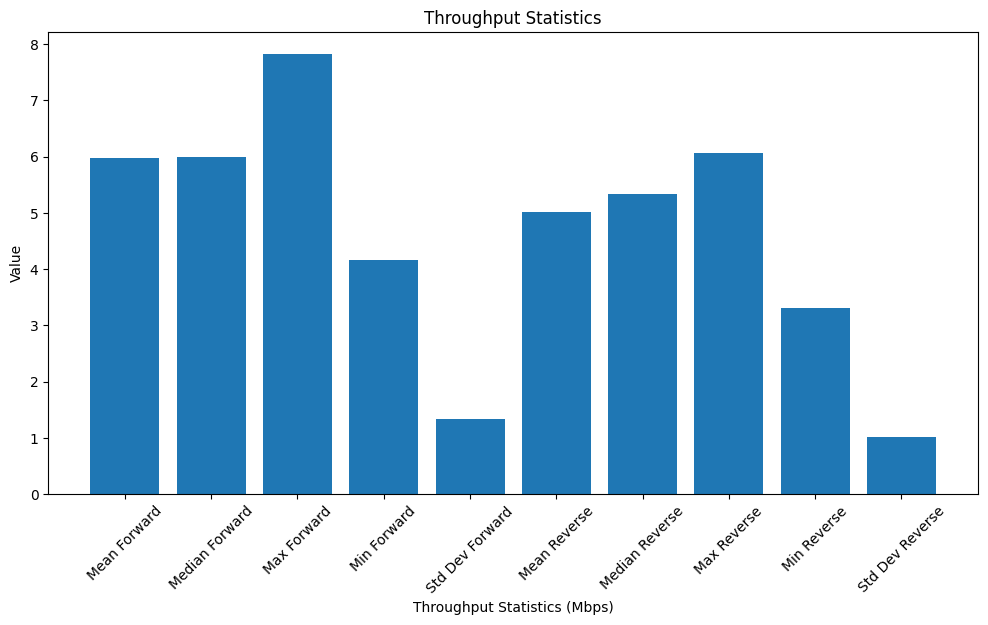

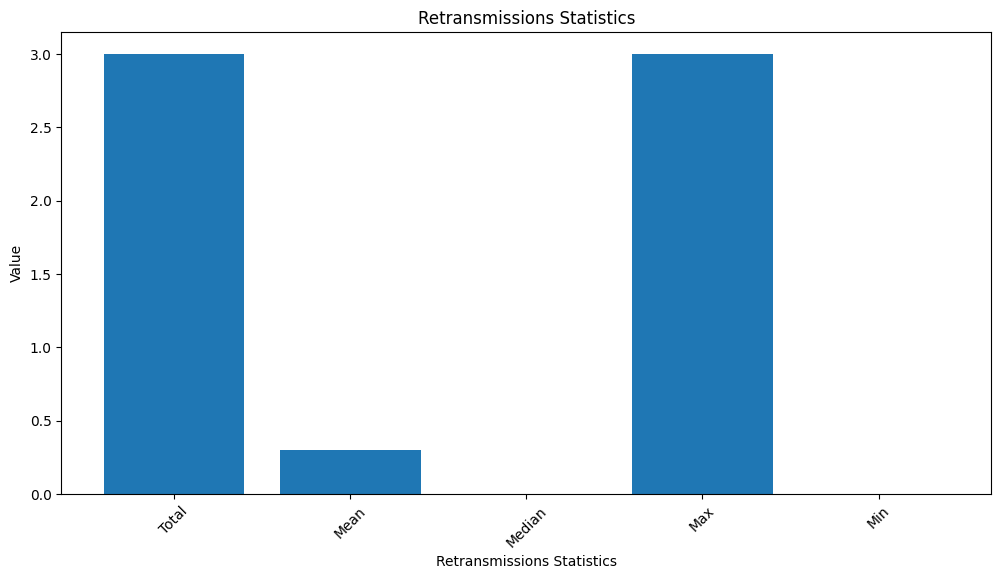

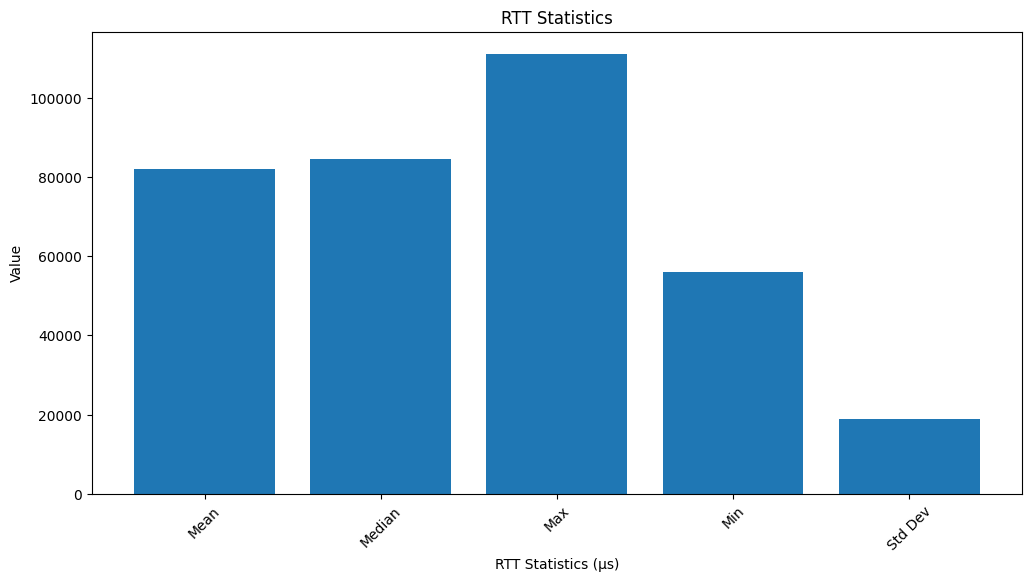

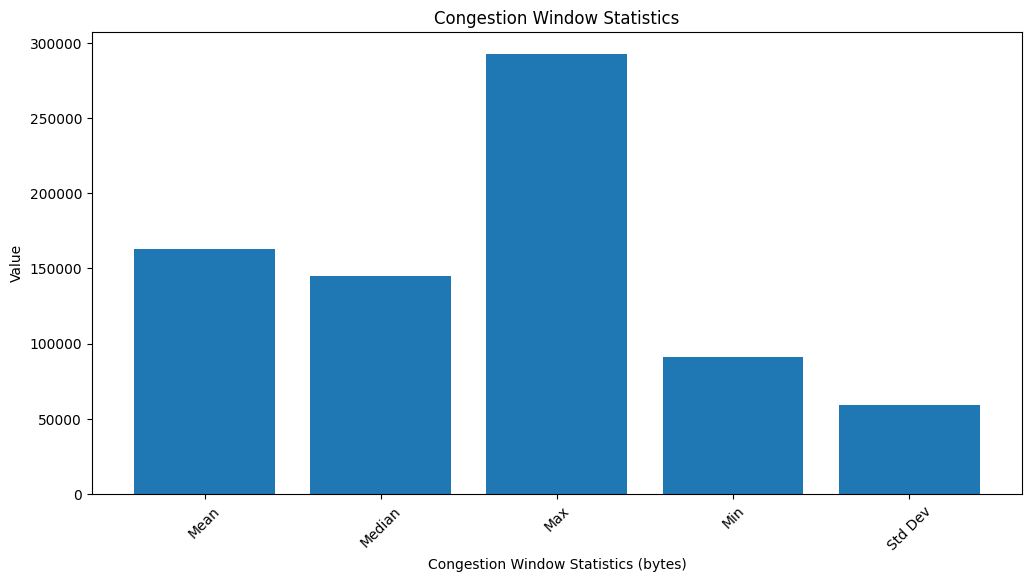

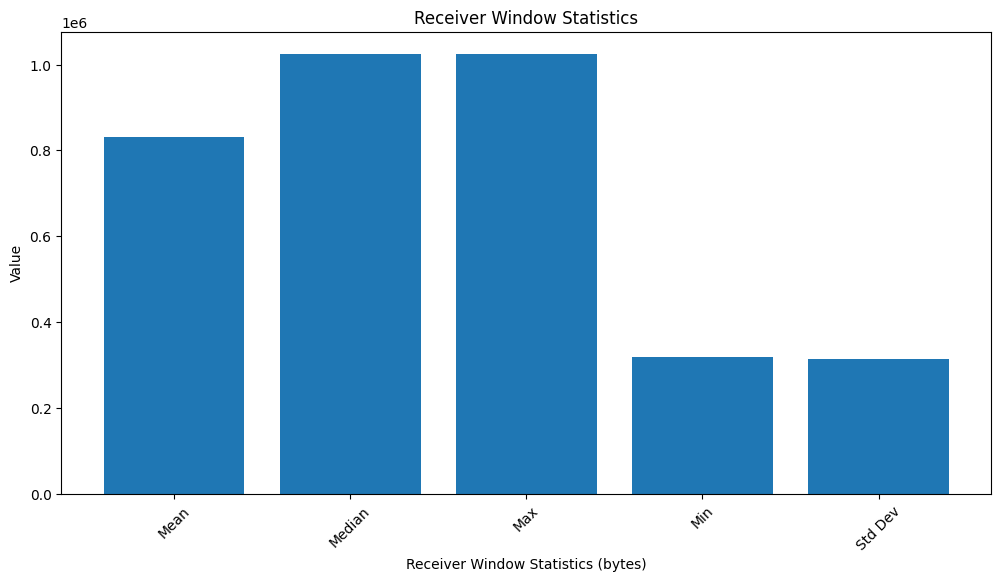

In [8]:
import json
import statistics
import matplotlib.pyplot as plt

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [
    statistics.mean(throughputs),
    statistics.median(throughputs),
    max(throughputs),
    min(throughputs),
    statistics.stdev(throughputs),
    statistics.mean(reverse_throughputs),
    statistics.median(reverse_throughputs),
    max(reverse_throughputs),
    min(reverse_throughputs),
    statistics.stdev(reverse_throughputs)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(throughput_stats)), throughput_stats)
plt.xticks(range(len(throughput_stats)), ['Mean Forward', 'Median Forward', 'Max Forward', 'Min Forward', 'Std Dev Forward', 'Mean Reverse', 'Median Reverse', 'Max Reverse', 'Min Reverse', 'Std Dev Reverse'], rotation=45)
plt.xlabel('Throughput Statistics (Mbps)')
plt.ylabel('Value')
plt.title('Throughput Statistics')
plt.show()

# Retransmissions Statistics
retransmit_stats = [
    sum(retransmits),
    statistics.mean(retransmits),
    statistics.median(retransmits),
    max(retransmits),
    min(retransmits)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(retransmit_stats)), retransmit_stats)
plt.xticks(range(len(retransmit_stats)), ['Total', 'Mean', 'Median', 'Max', 'Min'], rotation=45)
plt.xlabel('Retransmissions Statistics')
plt.ylabel('Value')
plt.title('Retransmissions Statistics')
plt.show()

# RTT Statistics
rtt_stats = [
    statistics.mean(rtts),
    statistics.median(rtts),
    max(rtts),
    min(rtts),
    statistics.stdev(rtts)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rtt_stats)), rtt_stats)
plt.xticks(range(len(rtt_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('RTT Statistics (μs)')
plt.ylabel('Value')
plt.title('RTT Statistics')
plt.show()

# Congestion Window Statistics
cwnd_stats = [
    statistics.mean(cwnds),
    statistics.median(cwnds),
    max(cwnds),
    min(cwnds),
    statistics.stdev(cwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(cwnd_stats)), cwnd_stats)
plt.xticks(range(len(cwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Congestion Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Congestion Window Statistics')
plt.show()

# Receiver Window Statistics
rwnd_stats = [
    statistics.mean(rwnds),
    statistics.median(rwnds),
    max(rwnds),
    min(rwnds),
    statistics.stdev(rwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rwnd_stats)), rwnd_stats)
plt.xticks(range(len(rwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Receiver Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Receiver Window Statistics')
plt.show()

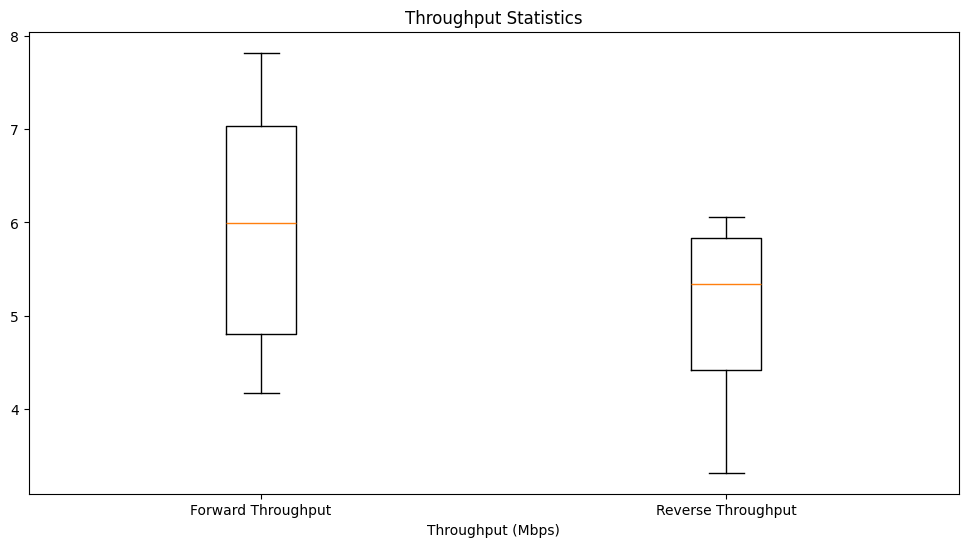

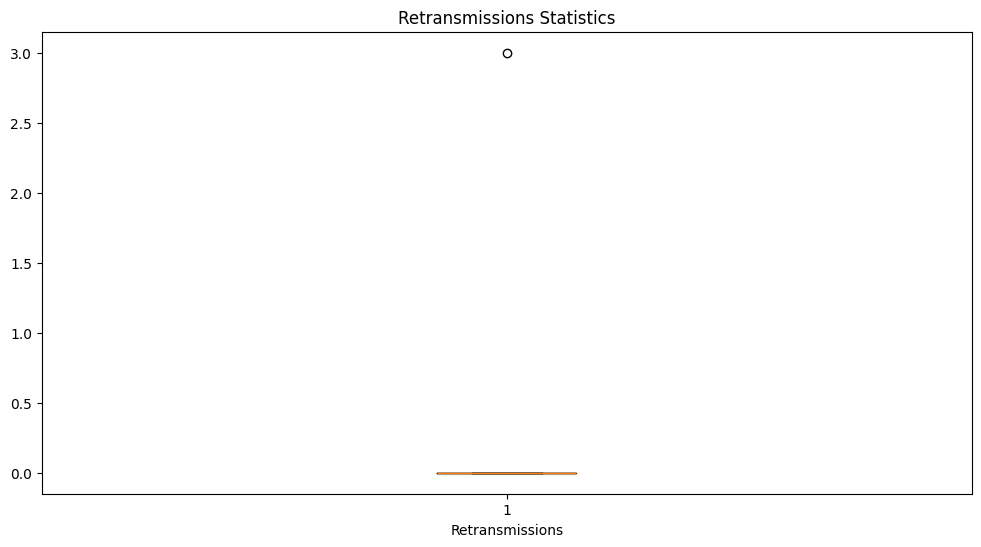

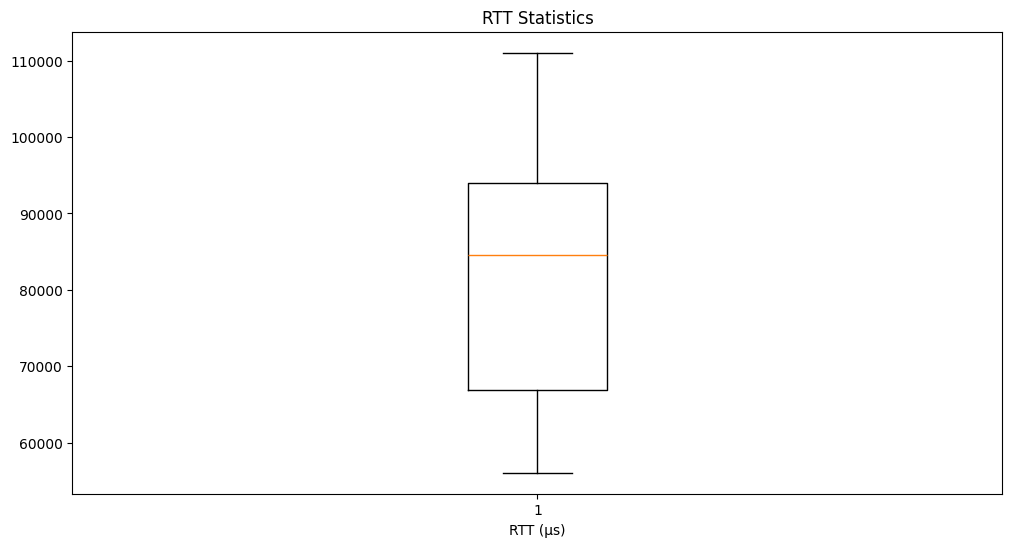

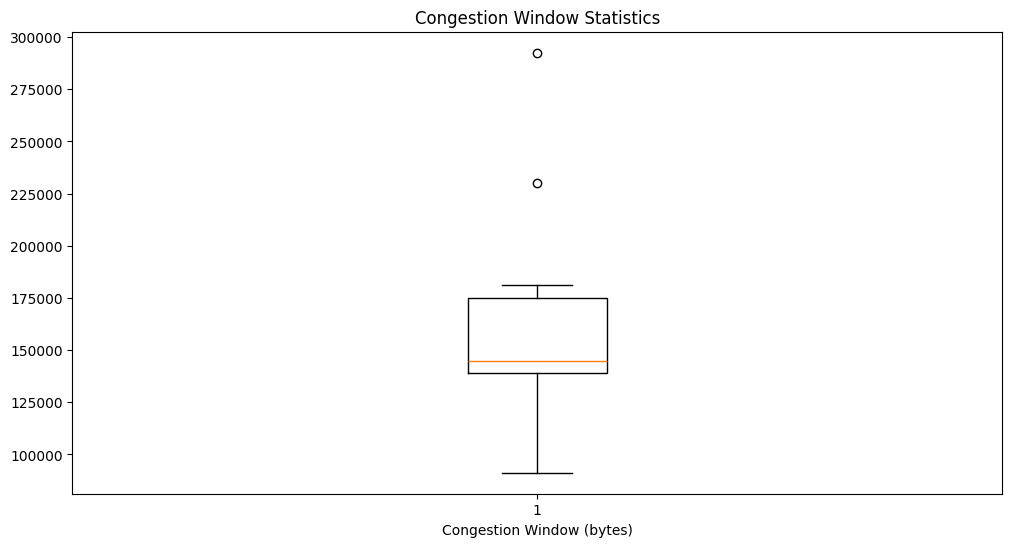

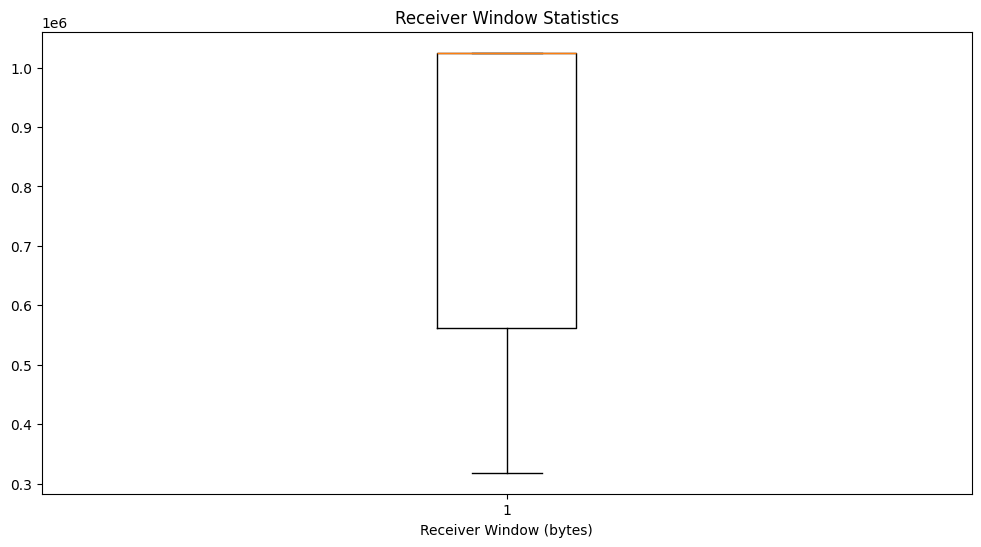

In [9]:
import json
import statistics
import matplotlib.pyplot as plt

# Load the JSON data
with open('test.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [throughputs, reverse_throughputs]
throughput_labels = ['Forward Throughput', 'Reverse Throughput']

plt.figure(figsize=(12, 6))
plt.boxplot(throughput_stats, labels=throughput_labels)
plt.xlabel('Throughput (Mbps)')
plt.title('Throughput Statistics')
plt.show()

# Retransmissions Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(retransmits)
plt.xlabel('Retransmissions')
plt.title('Retransmissions Statistics')
plt.show()

# RTT Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(rtts)
plt.xlabel('RTT (μs)')
plt.title('RTT Statistics')
plt.show()

# Congestion Window Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(cwnds)
plt.xlabel('Congestion Window (bytes)')
plt.title('Congestion Window Statistics')
plt.show()

# Receiver Window Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(rwnds)
plt.xlabel('Receiver Window (bytes)')
plt.title('Receiver Window Statistics')
plt.show()

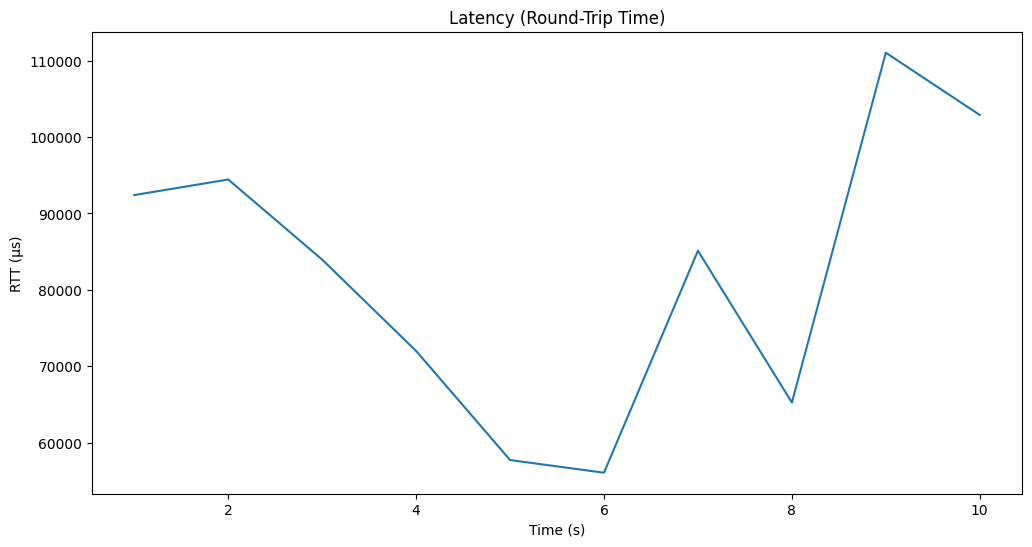

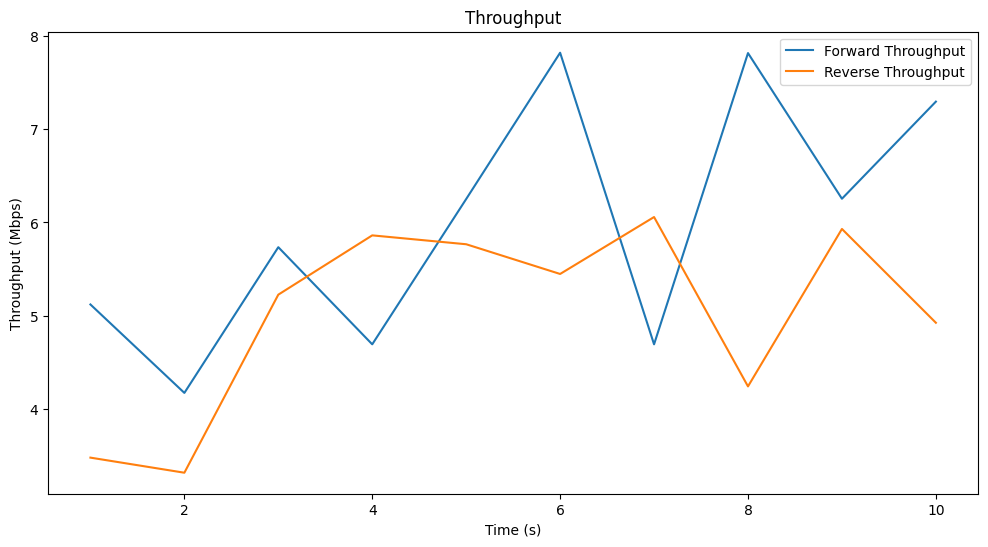

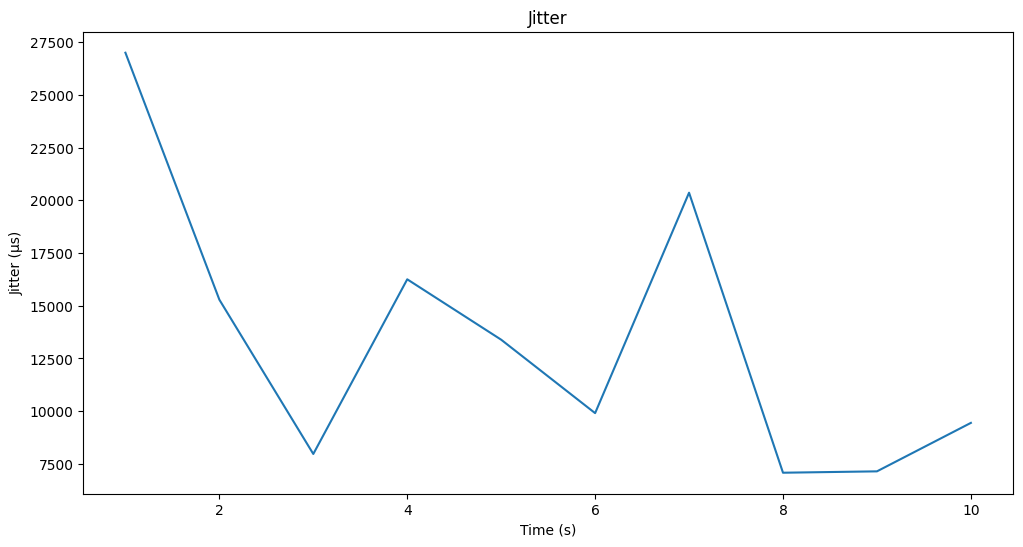

Connected Hosts:


In [11]:
import json
import statistics
import matplotlib.pyplot as plt

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
timestamps = [interval['sum']['end'] for interval in intervals]
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
jitters = [interval['streams'][0]['rttvar'] for interval in intervals]

# Latency (RTT)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, rtts)
plt.xlabel('Time (s)')
plt.ylabel('RTT (μs)')
plt.title('Latency (Round-Trip Time)')
plt.show()

# Throughput
plt.figure(figsize=(12, 6))
plt.plot(timestamps, throughputs, label='Forward Throughput')
plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

# Jitter
plt.figure(figsize=(12, 6))
plt.plot(timestamps, jitters)
plt.xlabel('Time (s)')
plt.ylabel('Jitter (μs)')
plt.title('Jitter')
plt.show()

# Connectivity
connected_hosts = set()
for interval in data['intervals']:
    for stream in interval['streams']:
        if 'local_host' in stream and 'remote_host' in stream:
            connected_hosts.add((stream['local_host'], stream['remote_host']))

print("Connected Hosts:")
for local_host, remote_host in connected_hosts:
    print(f"Local Host: {local_host}, Remote Host: {remote_host}")

['data/pi1/data0.json', 'data/pi1/data1.json', 'data/pi1/data2.json']


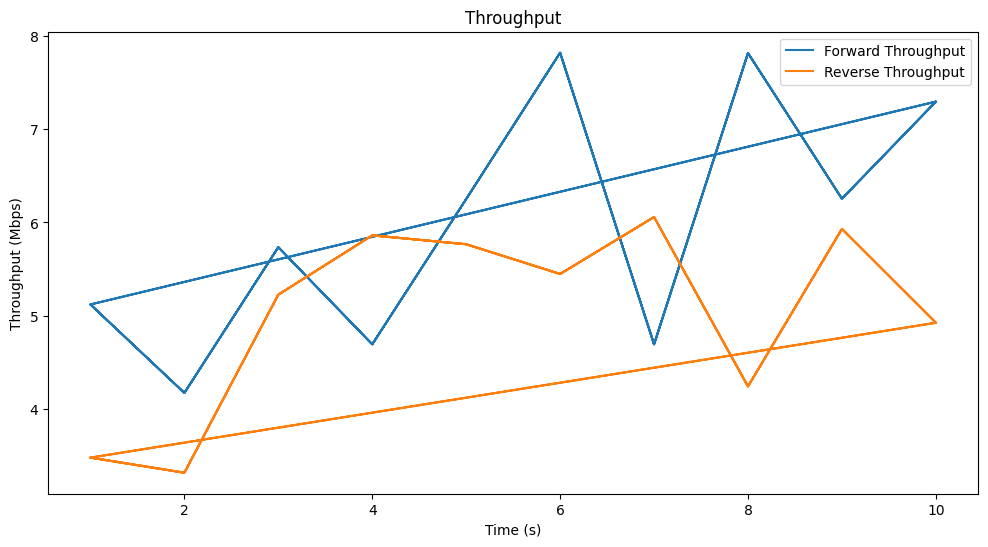

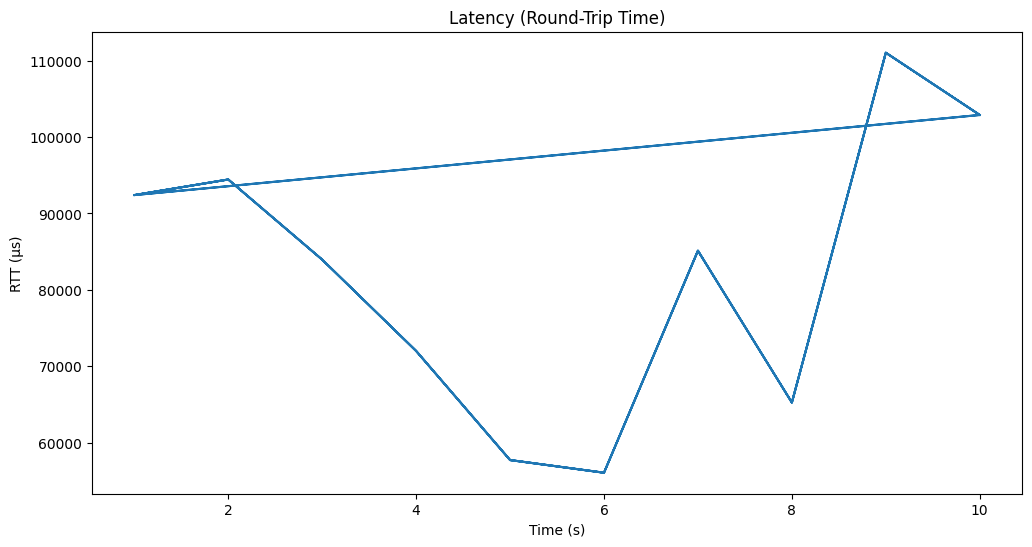

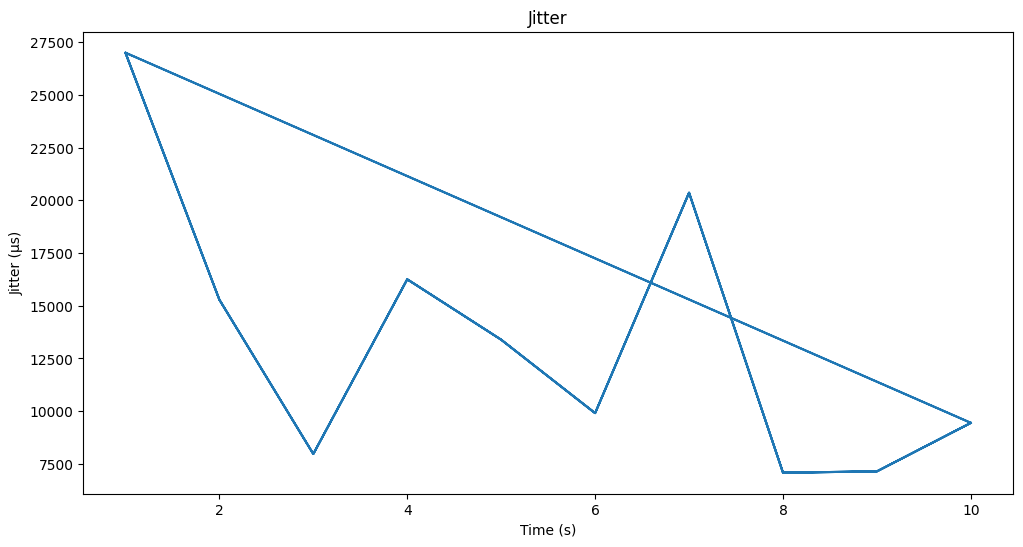

Throughput Statistics (Mbps):
Mean Forward Throughput: 5.99
Median Forward Throughput: 5.99
Max Forward Throughput: 7.82
Min Forward Throughput: 4.17
Standard Deviation Forward Throughput: 1.29
Mean Reverse Throughput: 5.02
Median Reverse Throughput: 5.34
Max Reverse Throughput: 6.06
Min Reverse Throughput: 3.31
Standard Deviation Reverse Throughput: 0.98


In [13]:
import json
import statistics
import matplotlib.pyplot as plt
import glob

# List of JSON files
json_files = glob.glob('data/pi1/*.json')
print(json_files)

# Initialize lists to store data
all_timestamps = []
all_throughputs = []
all_reverse_throughputs = []
all_rtts = []
all_jitters = []

# Iterate over JSON files and extract data
for json_file in json_files:
    with open(json_file) as f:
        data = json.load(f)

    intervals = data['intervals']
    timestamps = [interval['sum']['end'] for interval in intervals]
    throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
    reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
    rtts = [interval['streams'][0]['rtt'] for interval in intervals]
    jitters = [interval['streams'][0]['rttvar'] for interval in intervals]

    all_timestamps.extend(timestamps)
    all_throughputs.extend(throughputs)
    all_reverse_throughputs.extend(reverse_throughputs)
    all_rtts.extend(rtts)
    all_jitters.extend(jitters)

# Data analysis and visualization
plt.figure(figsize=(12, 6))
plt.plot(all_timestamps, all_throughputs, label='Forward Throughput')
plt.plot(all_timestamps, all_reverse_throughputs, label='Reverse Throughput')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(all_timestamps, all_rtts)
plt.xlabel('Time (s)')
plt.ylabel('RTT (μs)')
plt.title('Latency (Round-Trip Time)')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(all_timestamps, all_jitters)
plt.xlabel('Time (s)')
plt.ylabel('Jitter (μs)')
plt.title('Jitter')
plt.show()

# Throughput statistics
print("Throughput Statistics (Mbps):")
print(f"Mean Forward Throughput: {statistics.mean(all_throughputs):.2f}")
print(f"Median Forward Throughput: {statistics.median(all_throughputs):.2f}")
print(f"Max Forward Throughput: {max(all_throughputs):.2f}")
print(f"Min Forward Throughput: {min(all_throughputs):.2f}")
print(f"Standard Deviation Forward Throughput: {statistics.stdev(all_throughputs):.2f}")
print(f"Mean Reverse Throughput: {statistics.mean(all_reverse_throughputs):.2f}")
print(f"Median Reverse Throughput: {statistics.median(all_reverse_throughputs):.2f}")
print(f"Max Reverse Throughput: {max(all_reverse_throughputs):.2f}")
print(f"Min Reverse Throughput: {min(all_reverse_throughputs):.2f}")
print(f"Standard Deviation Reverse Throughput: {statistics.stdev(all_reverse_throughputs):.2f}")

#draw topology

In [15]:
import json

def read_batman_topology(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print("File not found.")
        return None
    except json.JSONDecodeError:
        print("Invalid JSON format.")
        return None

# Example usage:
file_path = './topology.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    print("BATMAN Topology:")
    print(batman_topology)


BATMAN Topology:
{'source_version': 'debian-2023.0-1', 'algorithm': 4, 'vis': [{'primary': 'b8:27:eb:43:8e:82', 'neighbors': [{'router': 'b8:27:eb:43:8e:82', 'neighbor': 'd8:3a:dd:f5:1f:14', 'metric': '1.308'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:49', 'metric': '1.143'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:3a', 'metric': '1.378'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:51', 'metric': '1.067'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:d0', 'metric': '1.244'}], 'clients': ['33:33:ff:d2:7f:5f', '33:33:00:00:00:fb', '01:00:5e:00:00:01', '01:00:5e:00:00:fb', 'd6:56:90:d2:7f:5f', '33:33:00:00:00:01']}]}


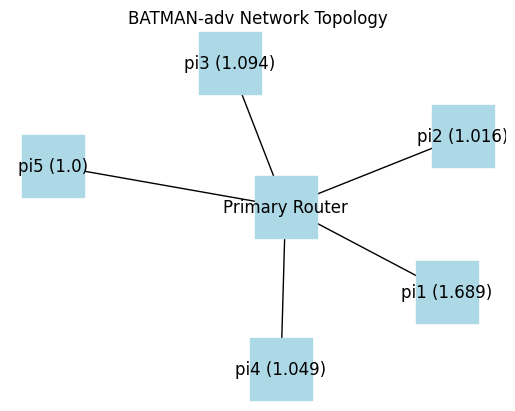

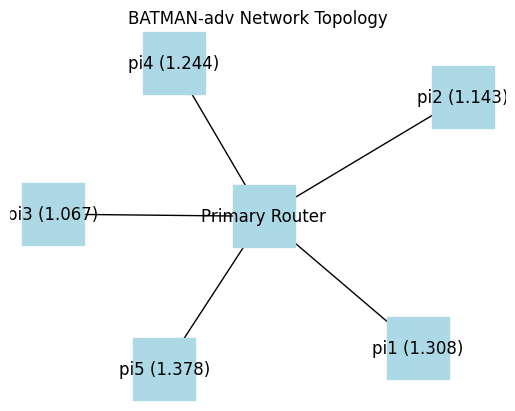

In [36]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def read_batman_topology(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print("File not found.")
        return None
    except json.JSONDecodeError:
        print("Invalid JSON format.")
        return None

def draw_batman_topology(batman_topology, mac_to_name):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for primary router and clients
    primary_router = batman_topology['vis'][0]['primary']
    clients = batman_topology['vis'][0]['clients']
    G.add_node(primary_router, type='router', label=mac_to_name.get(primary_router, 'Primary Router'))
    # for client in clients:
        # G.add_node(client, type='client', label=mac_to_name.get(client, 'Client'))

    # Add edges for neighbors with their metrics
    neighbors = batman_topology['vis'][0]['neighbors']
    for neighbor in neighbors:
        router = neighbor['router']
        neighbor_mac = neighbor['neighbor']
        metric = float(neighbor['metric'])
        G.add_node(neighbor_mac, type='router', label=f"{mac_to_name.get(neighbor_mac, 'Neighbor')} ({metric})")
        G.add_edge(router, neighbor_mac)

    # Draw the graph
    pos = nx.spring_layout(G)  # Set positions of nodes
    node_labels = nx.get_node_attributes(G, 'label')

    # Draw nodes as rectangles (squares)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_shape='s', node_size=2000)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw_networkx_edges(G, pos)

    plt.title('BATMAN-adv Network Topology')
    plt.axis('off')  # Turn off axis
    plt.show()

# Mapping of MAC addresses to names
mac_to_name = {
    '2c:cf:67:26:66:d0': 'pi4',
    '2c:cf:67:26:66:49': 'pi2',
    '2c:cf:67:26:66:3a': 'pi5',
    'd8:3a:dd:f5:1f:14': 'pi1',
    '2c:cf:67:26:66:51': 'pi3'
}

# Example usage:
file_path = './topology.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    draw_batman_topology(batman_topology, mac_to_name)

    # Example usage:
file_path = './topology2.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    draw_batman_topology(batman_topology, mac_to_name)


In [40]:
import re
import json

reference_string = '''
 172.27.0.1 
172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1
172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089
172.27.0.2 : xmt/rcv/%loss = 5/0/100%
172.27.0.3 : xmt/rcv/%loss = 5/0/100%
172.27.0.4 : xmt/rcv/%loss = 5/0/100%
172.27.0.5 : xmt/rcv/%loss = 5/0/100%
'''
print("REFERENCE")
print(reference_string)

data = reference_string.split("\n")[2:]
print(data)
# get unique ip addresses 
ips = set()
for i in range(len(data)):
    if len(data[i]) > 0:
        ips.add(data[i].split()[0])

print("DATA: ", data)
# remove empty strings
for i in range(len(data)):
    if len(data[i]) == 0:
        data.pop(i)
for d in data: 
    ip,xmt,rcv,loss,min,avg,max =None, None, None, None, None, None, None
    # fill array with -1 
    populated_arr = [-1,-1,-1,-1,-1,-1,-1]
    d = d.strip()
    # remove all spaces
    d = d.replace(" ", "")
    # if " min/avg/max = " in d:
    d = d.replace ("min/avg/max=", "")
    d = d.replace("%", "")
    d=d.replace(":", "")
    d = d.replace("xmt/rcv/loss=", ",")
    d = d.replace("/", ",") 
    d = d.split(",")
    for i in range(len(d)):
        populated_arr[i] = d[i]
    print(populated_arr)
    






REFERENCE

 172.27.0.1 
172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1
172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089
172.27.0.2 : xmt/rcv/%loss = 5/0/100%
172.27.0.3 : xmt/rcv/%loss = 5/0/100%
172.27.0.4 : xmt/rcv/%loss = 5/0/100%
172.27.0.5 : xmt/rcv/%loss = 5/0/100%

['172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1', '172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089', '172.27.0.2 : xmt/rcv/%loss = 5/0/100%', '172.27.0.3 : xmt/rcv/%loss = 5/0/100%', '172.27.0.4 : xmt/rcv/%loss = 5/0/100%', '172.27.0.5 : xmt/rcv/%loss = 5/0/100%', '']
DATA:  ['172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1', '172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089', '172.27.0.2 : xmt/rcv/%loss = 5/0/100%', '172.27.0.3 : xmt/rcv/%loss = 5/0/100%', '172.27.0.4 : xmt/rcv/%loss = 5/0/100%', '172.27.0.5 : xmt/rcv/%loss = 5/0/100%', '']
D:  ['172.27.0.0', '5', '5', '0', '1.83', '17.9', '56.1']
['1